In [264]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [265]:
%matplotlib inline

In [4]:
df = pd.read_csv("/Users/Man/Desktop/Machine Learning Exercise/machine-learning-ex1/ex1/ex1data1.txt", header = None)

In [12]:
df.rename({0:"Population", 1:"Profit"}, axis="columns", inplace=True)

In [13]:
df.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [27]:
# initialize θ0 = 0 and θ1 = 0
parameter = np.matrix([0,0]).reshape(2,1s)

In [26]:
parameter

matrix([[0],
        [0]])

In [28]:
# create a new column for df with X1 = 1
df["X1"] = 1

In [29]:
df.head()

,Population,Profit,X1
0,6.1101,17.5920,1
1,5.5277,9.1302,1
2,8.5186,13.6620,1
3,7.0032,11.8540,1
4,5.8598,6.8233,1


In [34]:
df = df[["X1", "Population", "Profit"]]
df.head()

,X1,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [84]:
#separate the X column from the Y column
X = df.iloc[:,:2]
Y = df.iloc[:, 2]

In [85]:
X.head()

,X1,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [91]:
Y = Y.to_frame()

In [92]:
Y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [209]:
# create a function to calculate the cost function
def computeCost(x, y, theta):
    length = len(x)
    return float(sum(np.power(((X.values * theta) - Y.values), 2)) / (2*length))

In [210]:
computeCost(X, Y, parameter)

32.072733877455654

In [250]:
# create a function to calculate gradientDescent
def gradientDescent(x, y, theta, alpha, num_iter):
    for i in range(num_iter):
        theta = theta - ((alpha/len(x)) * (x.transpose().values * (x.values * theta - y.values)))
    return theta

In [270]:
gradientDescent(X, Y, parameter, 0.01, 1500)

matrix([[-3.63029144],
        [ 1.16636235]])

In [255]:
# create a debug function to see if the gradient descent function is working properly
def debug(x,y,theta,alpha, num_iter):
    cost = []
    for i in range(num_iter):
        cost.append(computeCost(x, y, gradientDescent(x, y, theta, alpha, i)))
    return cost

In [278]:
y_axis = debug(X,Y,parameter,0.01,100)

In [274]:
x_axis = np.arange(100)

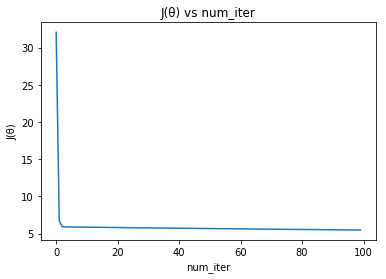

In [283]:
plt.plot(x_axis, y_axis)
plt.title("J(θ) vs num_iter")
plt.xlabel("num_iter")
plt.ylabel("J(θ)")
plt.show()
# as we can see, the gradient descent function is working perfectly with alpha = 0.01